<div class="alert alert-block alert-success">
    
# Berkeley PCMLAI: Module 21: Neural Networks
    
 👨‍🏫 **Vikesh K**      
 **Office Hour # 22**
  

</div>

**Uncomment the below code and install the required libraries**

In [ ]:
# !pip install tensorflow
# !pip install keras
# !pip install pydot

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

# misc
def create_comparision_df(nn):
    
    predictions_list = nn.predict(X_test).flatten().tolist()
    temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_list})
    return temp_df


def comparison_hist(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['Actual'], label='Actual')
    plt.hist(df['Predicted'], label='Predicted')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Actual vs. Predicted Values')
    plt.legend()
    plt.show()

## Predict cost of Medical Insurance


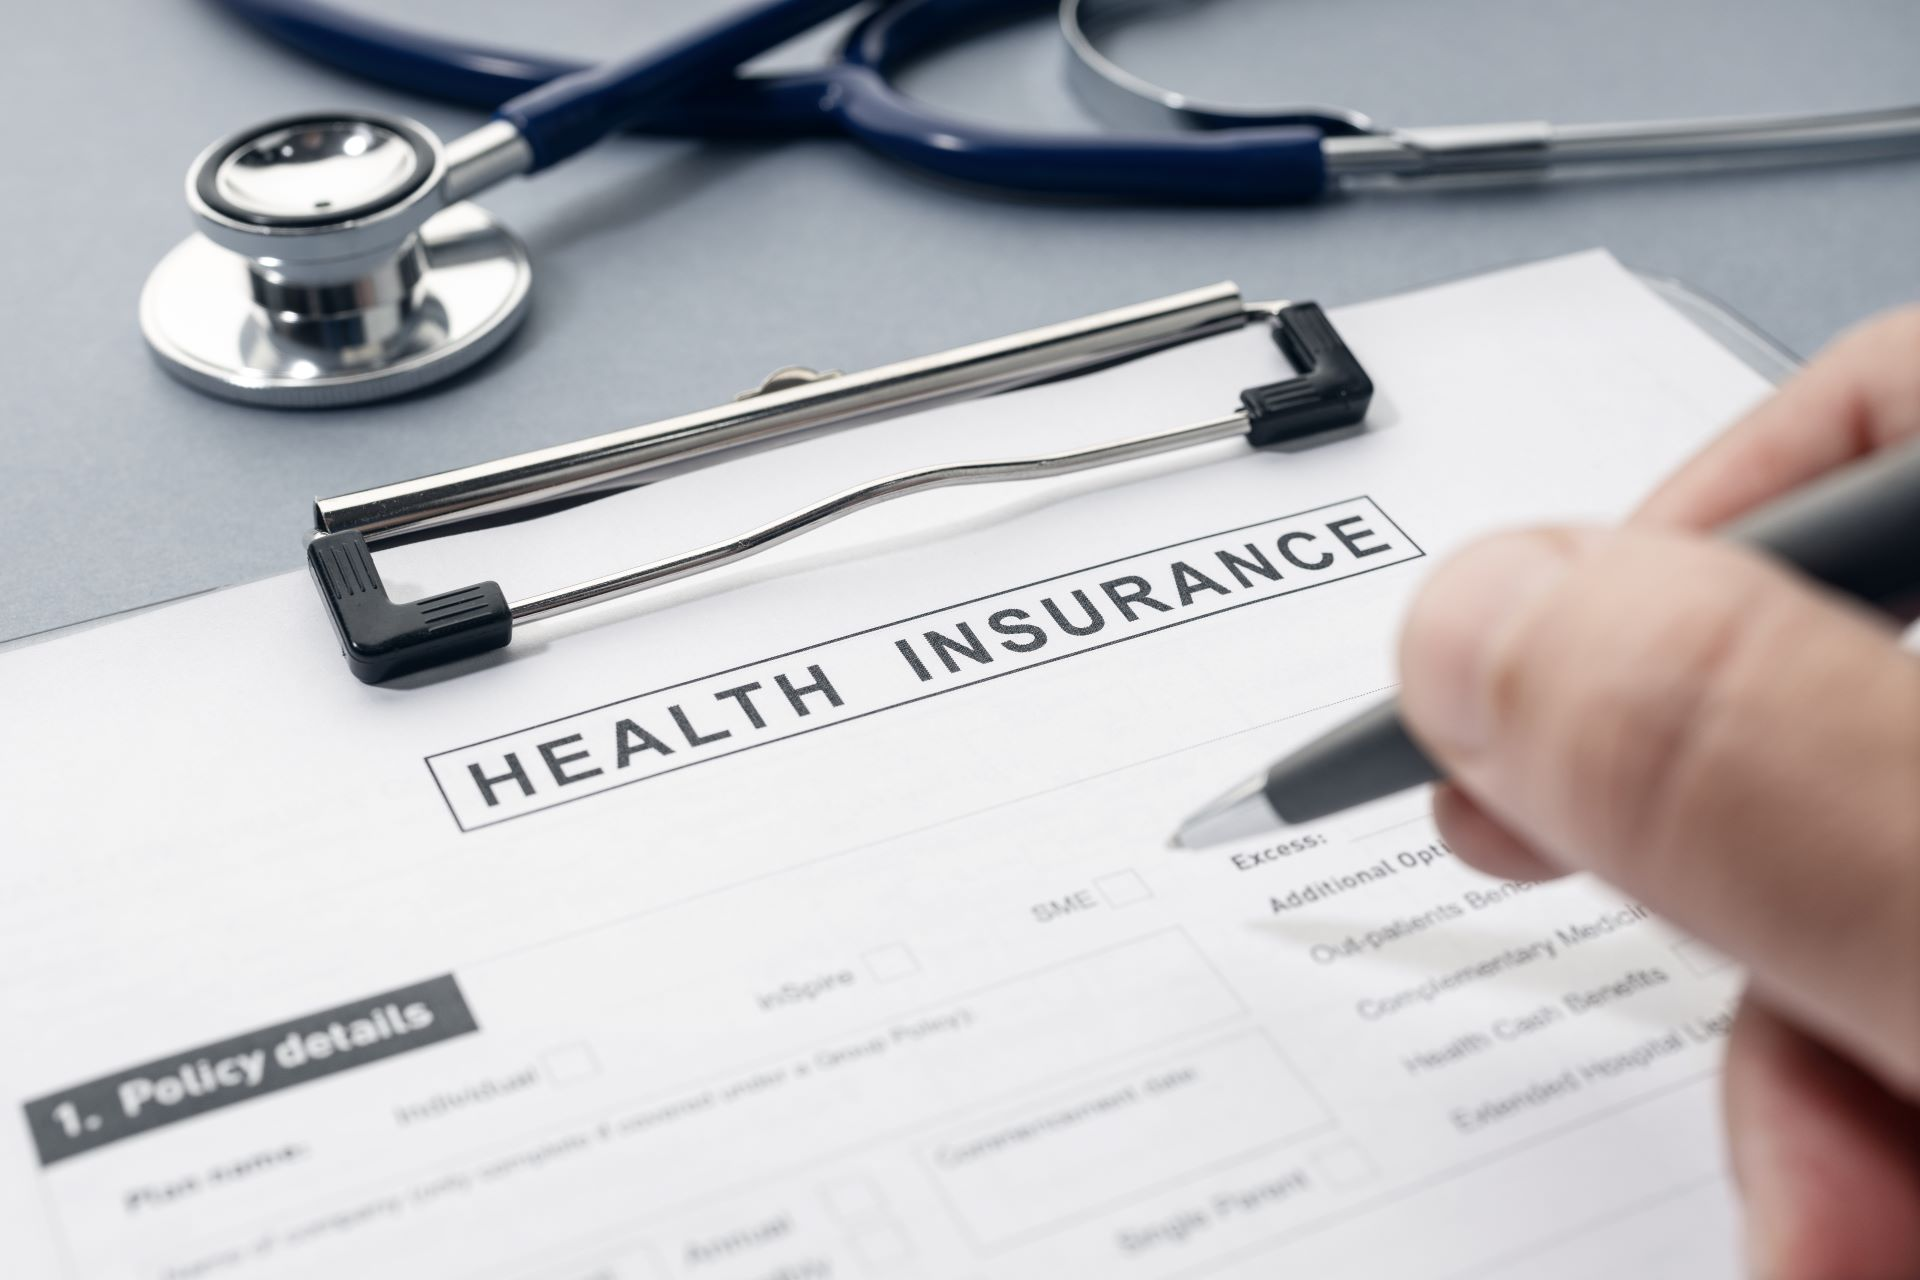

Source = [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)



In [179]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

In [180]:
df = pd.read_csv(url)

In [181]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

In [182]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [183]:
df.duplicated().sum()

1

In [184]:
df = df.drop_duplicates()

In [185]:
df.duplicated().sum()

0

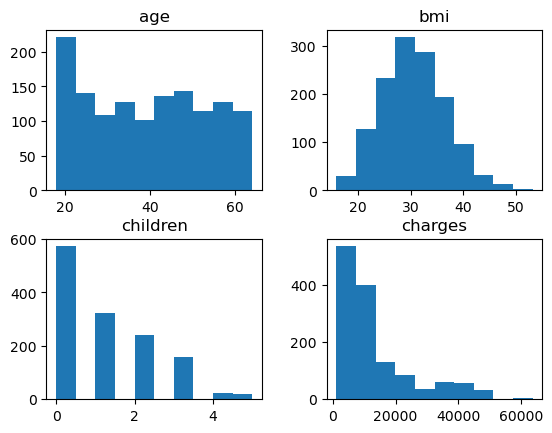

In [186]:
df.hist(grid = False);

In [188]:
df.describe([0.85, 0.95, 0.99])

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
50%,39.000000,30.400000,1.000000,9386.161300
85%,56.000000,37.050000,2.000000,25015.149044
95%,62.000000,41.108000,3.000000,41210.049800
99%,64.000000,46.411200,5.000000,48537.796878
max,64.000000,53.130000,5.000000,63770.428010


## Data Prep

**One-Hot Encoding**

In [189]:
one_hot_df = pd.get_dummies(df, drop_first = True, dtype = int)

In [190]:
one_hot_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


**Train-test split**

In [191]:
# Create X & y values
X = one_hot_df.drop("charges", axis=1)
y = one_hot_df["charges"]

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 

In [193]:
X_train.head(2)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1114,23,24.510,0,1,0,0,0,0
968,21,25.745,2,1,0,0,0,0


In [194]:
print(X_train.shape)
print(X_test.shape)

(1069, 8)
(268, 8)


In [ ]:
print(np.round(y.mean(),2))

## Architecture for a regression task

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

Source: Adapted from [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

## Shapes for NN

Shapes are important for neural networks. Two shapes we need to focus on
* **Input shape**: This is dependent on the dataset. It is what is feeded to the network 
* **Output shape**: This is shape of data that should come out of the model. For regression, it should be a single unit

NN accept numbers and output numbers which are represented using Tensors

### Modeling with Tensorflow Steps

3 steps to create a Tensorflow model 

* **Creating a model**- Put togther the layers of a network using Functional or Sequential API. 

* **Compiling a model** - define the evaluation (loss/metrics) and how it should improve (optimizers)

* **Fit the model** - Fitting the model on the data 

## Model 1: Basic Model 

In [195]:
tf.random.set_seed(34)

**Set the architecture of the model**

In [196]:
# create a model 
nn1 = tf.keras.Sequential([
        tf.keras.layers.Dense(units = 1)
    ])

In [198]:
# nn1

**Configuring the model for training**

We are specifying the: 

* Loss Function 
* Optimizer 
* Metrics


In [199]:
# compile 
nn1.compile(loss = tf.keras.losses.mae
          , optimizer = tf.keras.optimizers.SGD()
          , metrics = ['mae'])

In [200]:
# fit the model 
nn1_stages = nn1.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
34/34 [==============================] - 0s 1ms/step - loss: 12637.5371 - mae: 12637.5371
Epoch 2/10
34/34 [==============================] - 0s 1ms/step - loss: 11799.1426 - mae: 11799.1426
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 10977.9268 - mae: 10977.9268
Epoch 4/10
34/34 [==============================] - 0s 2ms/step - loss: 10212.5498 - mae: 10212.5498
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: 9569.5879 - mae: 9569.5879
Epoch 6/10
34/34 [==============================] - 0s 1ms/step - loss: 9031.1465 - mae: 9031.1465
Epoch 7/10
34/34 [==============================] - 0s 1ms/step - loss: 8575.1875 - mae: 8575.1875
Epoch 8/10
34/34 [==============================] - 0s 1ms/step - loss: 8208.0703 - mae: 8208.0703
Epoch 9/10
34/34 [==============================] - 0s 1ms/step - loss: 7915.1714 - mae: 7915.1714
Epoch 10/10
34/34 [==============================] - 0s 1ms/step - loss: 7689.6870 - mae: 7689.6870


### Model 1 check

**Visualize the drop in loss with each epoch**

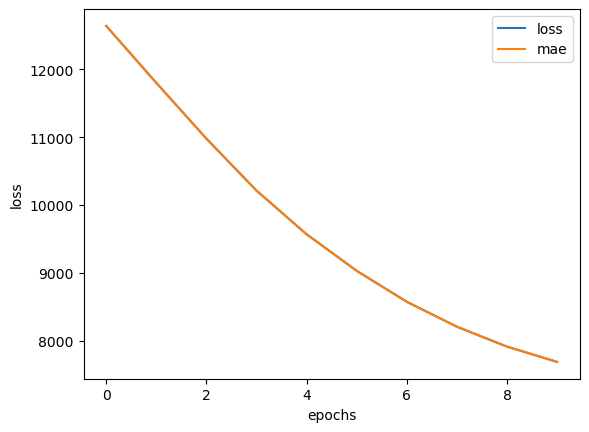

In [201]:
pd.DataFrame(nn1_stages.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

**understand the model architecture**

In [202]:
nn1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [204]:
# X_train.shape

**There are 9 params representing 8 features plus the bias term**

**Evaluate predictions**

In [205]:
y_test.mean().round(2)

14272.01

In [206]:
nn1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8754.0518 - mae: 8754.0518


[8754.0517578125, 8754.0517578125]

In [207]:
nn1_mae = nn1.evaluate(X_test, y_test, verbose = 0)[0]

**Loss also measures the MAE, hence the values are same**

9/9 [==============================] - 0s 1ms/step


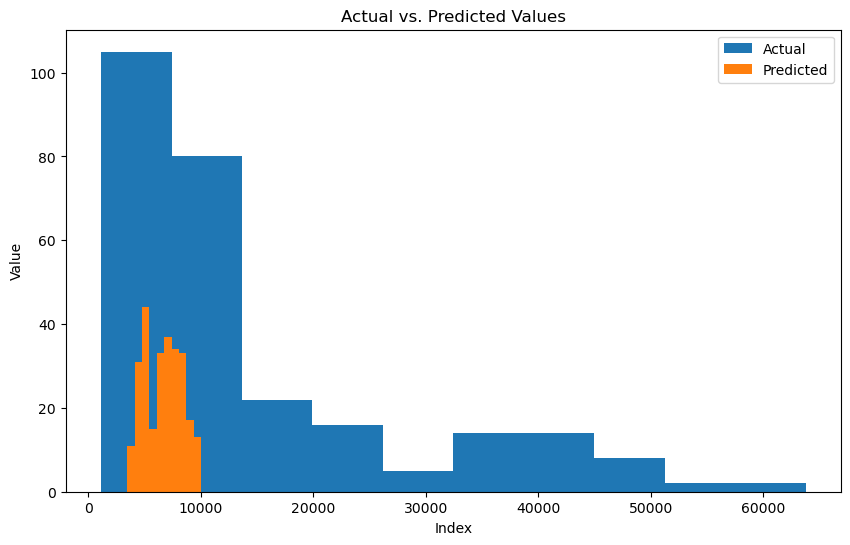

In [208]:
comparison_hist(create_comparision_df(nn1))

## Improving a NN model 

**We play around at each of the steps to improve the NN model**

* **Creating a model**
    * Add more layers
    * Add more units (neurons)
    * Change activation function of each layer
* **Compiling a model**
    * Change the optimization function 
    * Change the learning rate
* **Fitting a model**
    * increase the data (not possible many time)
    * increase the `epochs` (train for longer) 

* **Data Changes**
    * Scaling the data 

## Model 2: increase epochs

**Train the model for long**

Changing the number of epochs in a TensorFlow model affects how many times the model is updated using the training data

In [209]:
# create the model 
nn2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model 
nn2.compile(loss = tf.keras.losses.mae 
             ,optimizer = tf.keras.optimizers.SGD()
             ,metrics = ['mae'])

# fit the model 
nn2_stages = nn2.fit(X_train, y_train, epochs = 100, verbose = 0)

### Model 2 check

In [210]:
nn2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


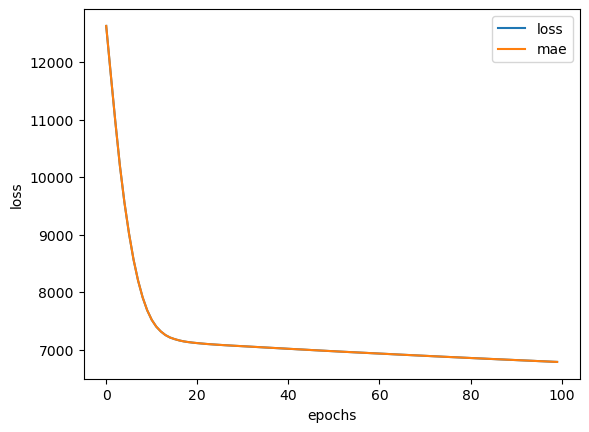

In [211]:
pd.DataFrame(nn2_stages.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [212]:
nn2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7839.7656 - mae: 7839.7656


[7839.765625, 7839.765625]

In [213]:
nn2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7839.7656 - mae: 7839.7656


[7839.765625, 7839.765625]

In [214]:
nn2_mae = nn2.evaluate(X_test, y_test, verbose = 0)[0]

9/9 [==============================] - 0s 2ms/step


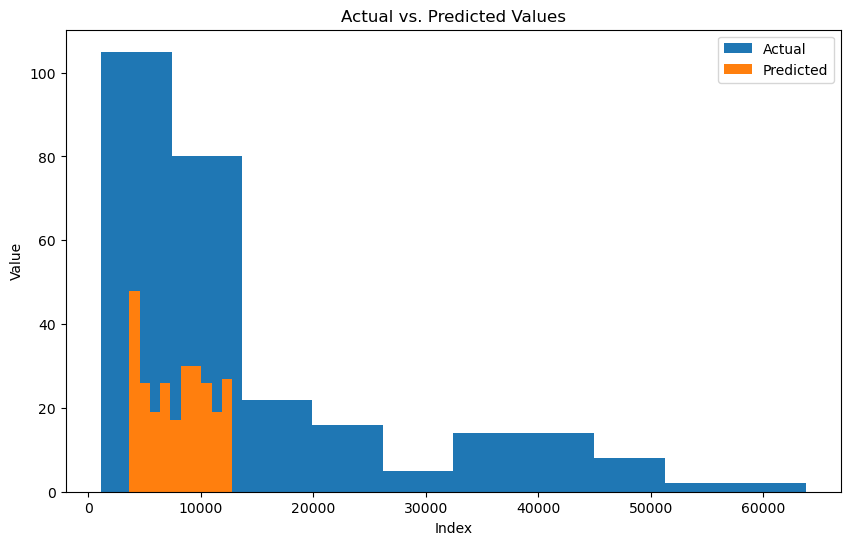

In [215]:
comparison_hist(create_comparision_df(nn2))

## Model 3: layers and learning rates

**Add layers and units and change the learning rate**


In [216]:
tf.random.set_seed(22)

# create the model 
nn3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100)
    ,tf.keras.layers.Dense(10)
    ,tf.keras.layers.Dense(1) # final output
])

# compile the model 
nn3.compile(loss = tf.keras.losses.mae
           ,optimizer = tf.keras.optimizers.SGD(learning_rate=0.001) # one needs to keep learning_rate very low for model to converge
           ,metrics = ['mae'])

# fit the model 
nn3_stages = nn3.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 10059.1768 - mae: 10059.1768
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7325.5156 - mae: 7325.5156
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7270.6982 - mae: 7270.6982
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7163.2944 - mae: 7163.2944
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7024.3604 - mae: 7024.3604
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7049.1011 - mae: 7049.1011
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7109.5444 - mae: 7109.5444
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7088.5186 - mae: 7088.5186
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7042.1562 - mae: 7042.1562
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7156.7388 - mae: 7156.73

34/34 [==============================] - 0s 4ms/step - loss: 7032.9360 - mae: 7032.9360
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 7121.9458 - mae: 7121.9458
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 7042.5254 - mae: 7042.5254
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 7052.0137 - mae: 7052.0137
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 7032.5215 - mae: 7032.5215
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 7065.7212 - mae: 7065.7212
Epoch 88/100
34/34 [==============================] - 0s 4ms/step - loss: 6869.9780 - mae: 6869.9780
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 7104.2861 - mae: 7104.2861
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 7037.1304 - mae: 7037.1304
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 7136.5469 - mae: 7136.5469
Epo

### Model 3 check

In [217]:
nn3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               900       
                                                                 
 dense_27 (Dense)            (None, 10)                1010      
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1921 (7.50 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


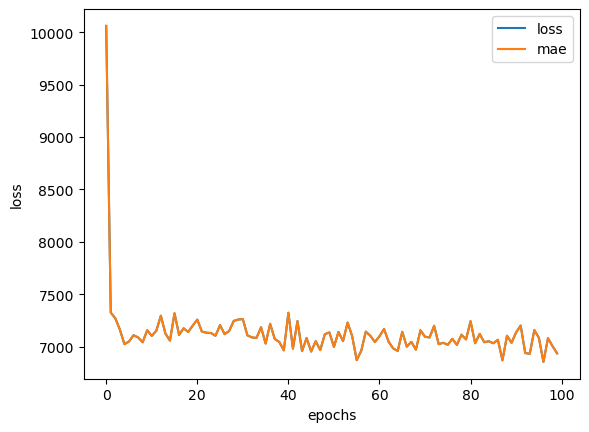

In [218]:
pd.DataFrame(nn3_stages.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
# plt.xlim(0, 20);

In [219]:
nn3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8451.7148 - mae: 8451.7148


[8451.71484375, 8451.71484375]

In [220]:
nn3_mae = nn3.evaluate(X_test, y_test, verbose = 0)[0]

9/9 [==============================] - 0s 2ms/step


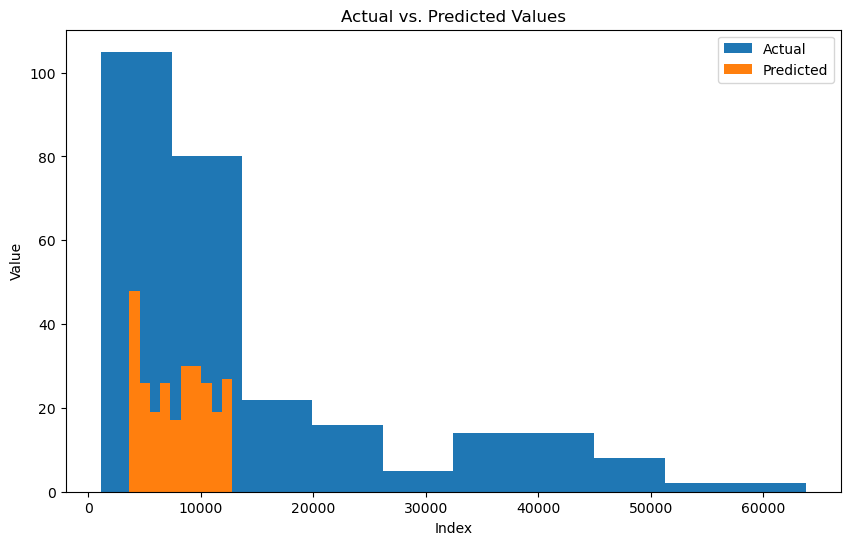

In [221]:
comparison_hist(create_comparision_df(nn2))

## Model 4: model 3 + Adam optimizer

**model 3 + Change the optimizer**

In [222]:
tf.random.set_seed(22)

# create the model 
nn4 = tf.keras.Sequential([
        tf.keras.layers.Dense(100)
        ,tf.keras.layers.Dense(10)
        ,tf.keras.layers.Dense(1)
])

# compile the model 
nn4.compile(loss = tf.keras.losses.mae
           ,optimizer = tf.keras.optimizers.Adam() # has an adaptive learning rate
           ,metrics = ['mae'])

# fit the model 
nn4_stages = nn4.fit(X_train, y_train, epochs = 100, verbose = 0)

### Model 4 check

In [223]:
nn4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 100)               900       
                                                                 
 dense_30 (Dense)            (None, 10)                1010      
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1921 (7.50 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


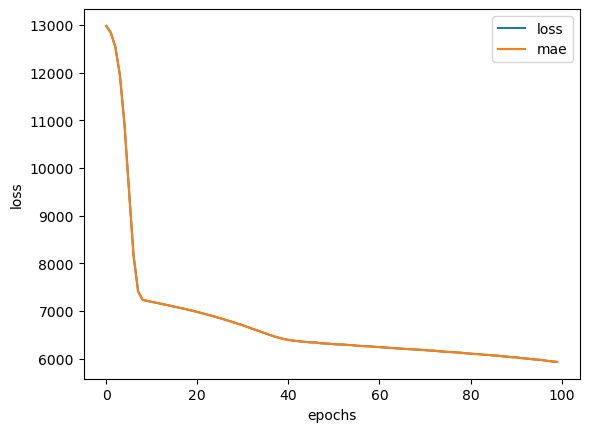

In [224]:
pd.DataFrame(nn4_stages.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
# plt.xlim(0, 20);

In [225]:
nn4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7018.4458 - mae: 7018.4458


[7018.44580078125, 7018.44580078125]

In [226]:
nn4_mae = nn4.evaluate(X_test, y_test, verbose = 0)[0]

9/9 [==============================] - 0s 1ms/step


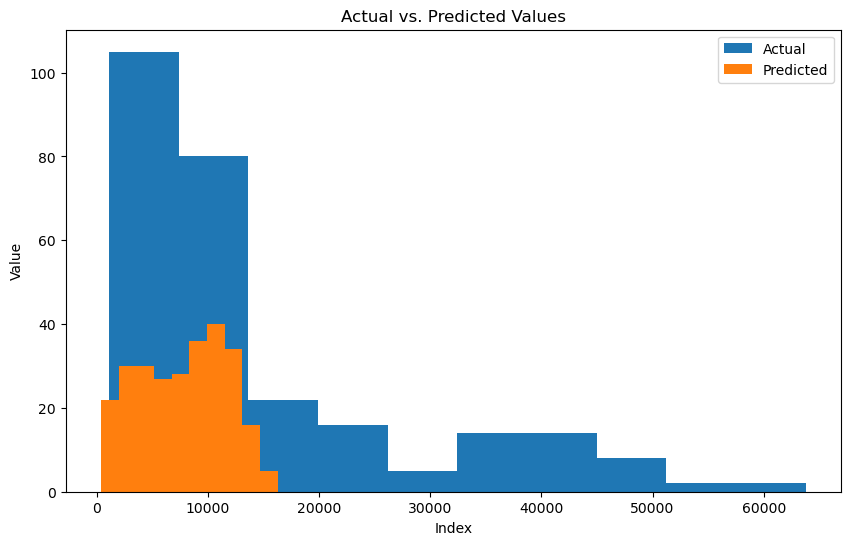

In [227]:
# compare the vales
comparison_hist(create_comparision_df(nn4))

## Normalization of data 

**NNs tend to favor normalized data (where value lies between 0 and 1) as that allows for faster convergence. They can also work decently without this feature scaling**

In [228]:
X_train[['age', 'bmi', 'children']].head()

,age,bmi,children
1114,23,24.510,0
968,21,25.745,2
599,52,37.525,2
170,63,41.470,0
275,47,26.600,2


In [230]:
# X_train[['age', 'bmi', 'children']].describe()

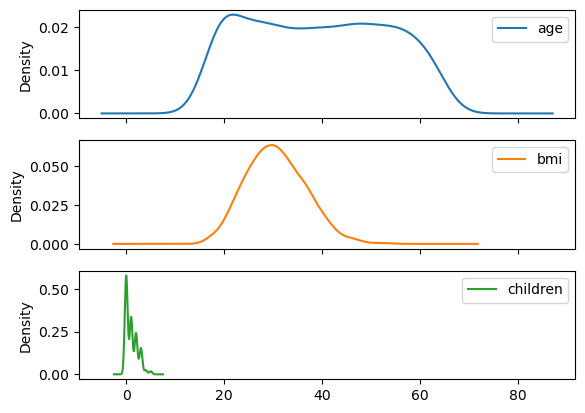

In [231]:
X_train[['age', 'bmi', 'children']].plot(kind = 'density', subplots = True);

In [232]:
mms = MinMaxScaler()

In [233]:
X_train[['age', 'bmi', 'children']] = mms.fit_transform(X_train[['age', 'bmi', 'children']])

In [238]:
# X_train[['age', 'bmi', 'children']].describe()

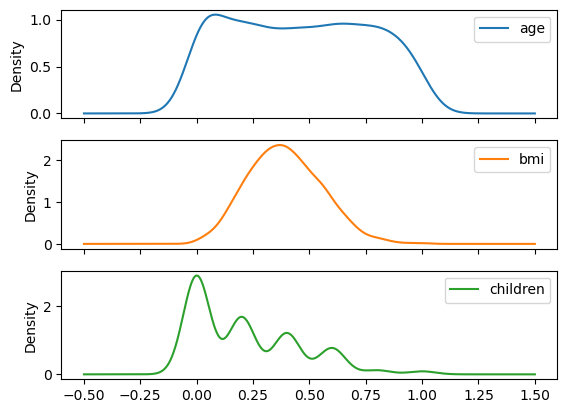

In [236]:
X_train[['age', 'bmi', 'children']].plot(kind = 'density', subplots = True);

**Scaling the test data**

In [239]:
X_test[['age', 'bmi', 'children']] = mms.transform(X_test[['age', 'bmi', 'children']])

In [240]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
900,0.673913,0.176352,0.0,1,0,0,0,0
1064,0.239130,0.259349,0.8,0,0,0,0,1
1256,0.717391,0.549502,0.6,0,0,1,0,0
298,0.282609,0.495830,0.6,1,1,1,0,0
237,0.282609,0.603444,0.4,1,0,0,1,0


## Model 5: Normalized data + model 4

In [241]:
tf.random.set_seed(22)

# create the model 
nn5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100)
    ,tf.keras.layers.Dense(10)
    ,tf.keras.layers.Dense(1)
])

# compile the model 
nn5.compile(loss = tf.keras.losses.mae
           ,optimizer = tf.keras.optimizers.Adam() # has an adaptive learning rate
           ,metrics = ['mae'])

# fit the model 
nn5_stages = nn5.fit(X_train, y_train, epochs = 100, verbose = 0)

### Model 5 check

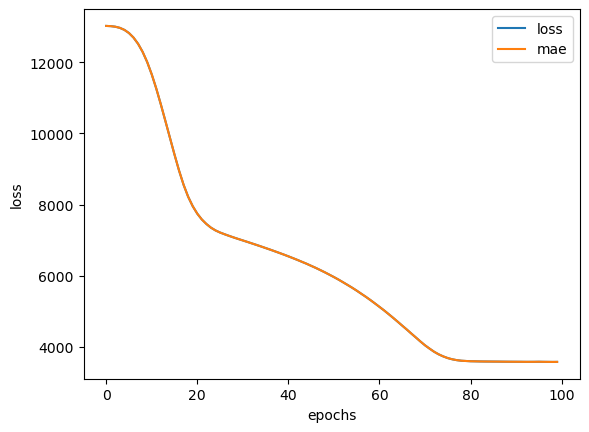

In [242]:
pd.DataFrame(nn5_stages.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
# plt.xlim(0, 20);

In [243]:
nn5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4080.0911 - mae: 4080.0911


[4080.091064453125, 4080.091064453125]

In [245]:
nn5_mae = nn5.evaluate(X_test, y_test, verbose = 0)[0]

9/9 [==============================] - 0s 1ms/step


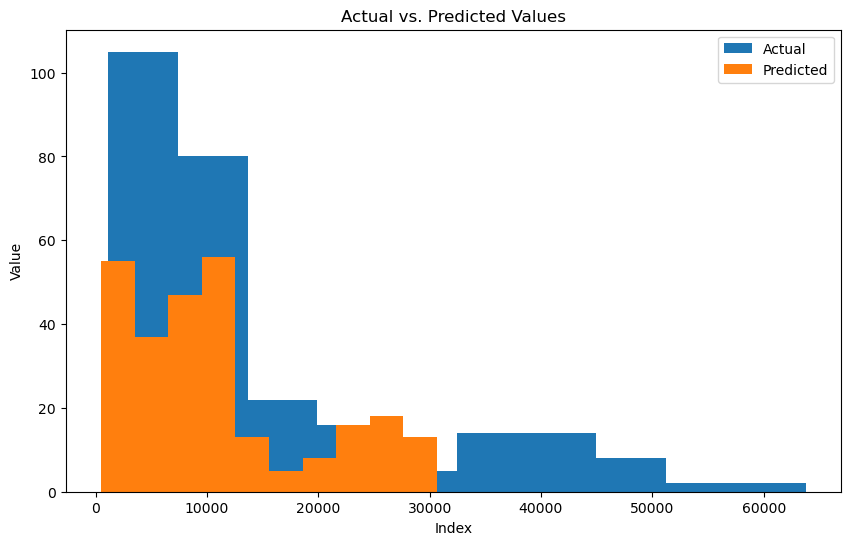

In [246]:
# compare the vales
comparison_hist(create_comparision_df(nn5))

## Putting the comparisons together

In [247]:
# List of models
models = [nn1, nn2, nn3, nn4, nn5]
mae_list = [nn1_mae, nn2_mae, nn3_mae, nn4_mae, nn5_mae]


# Evaluate each model and create a DataFrame
mae_df = pd.DataFrame({'nn_model': [f'nn{i+1}' for i in range(len(models))], 
                       'MAE': mae_list})

# Display the DataFrame
display(mae_df)

,nn_model,MAE
0,nn1,8754.051758
1,nn2,7839.765625
2,nn3,8451.714844
3,nn4,7018.445801
4,nn5,4080.091064


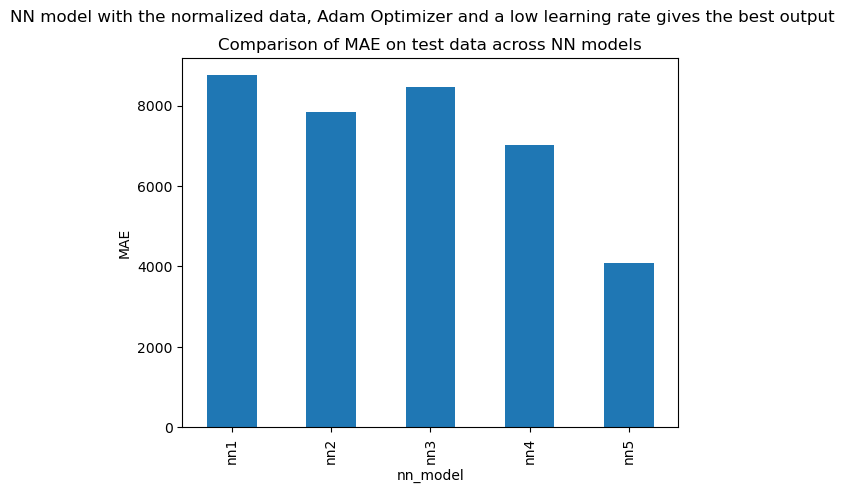

In [248]:
mae_df.plot(kind = "bar", x = "nn_model",  y = "MAE", legend = False);

plt.title("Comparison of MAE on test data across NN models")
plt.suptitle("NN model with the normalized data, Adam Optimizer and a low learning rate gives the best output");

plt.ylabel("MAE");